In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

print(city_data.columns, len(city_data))
print(ride_data.columns, len(ride_data))

# Combine the data into a single dataset
city_with_index = city_data.set_index('city')
ride_with_index = ride_data.set_index('city')

joined_table = ride_with_index.join(city_with_index)

# Display the data table for preview
joined_table.head()

Index(['city', 'driver_count', 'type'], dtype='object') 120
Index(['city', 'date', 'fare', 'ride_id'], dtype='object') 2375


,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


In [2]:
ride_count_by_city = joined_table.groupby(["city"]).count()
ride_count_by_city.head()

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Barronchester,16,16,16,16,16
Bethanyland,18,18,18,18,18
Bradshawfurt,10,10,10,10,10


In [3]:
ride_mean_by_city = joined_table.groupby(["city"]).mean()
ride_mean_by_city.head()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Barronchester,36.422500,4.460796e+12,11.0
Bethanyland,32.956111,5.842550e+12,22.0
Bradshawfurt,40.064000,3.735294e+12,7.0


## Bubble Plot of Ride Sharing Data

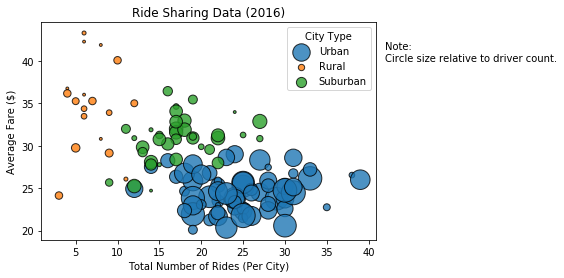

In [4]:
fig, ax = plt.subplots()

# Obtain the x and y coordinates for each of the three city types
ride_mean_by_city = ride_data.groupby(["city"]).mean()
ride_count_by_city = ride_data.groupby(["city"]).count()

# Build the scatter plots for each city types
for city_type in set(city_data["type"]):
    cities_of_type = city_data[city_data["type"] == city_type]
    mean_df = ride_mean_by_city.join(cities_of_type.set_index('city'), how="inner")
    count_df = ride_count_by_city.join(cities_of_type.set_index('city'), how="inner")
    
    avg_fare = mean_df["fare"]
    ride_count = count_df["ride_id"]
    driver_count = np.array(mean_df["driver_count"]) * 8
    
    ax.scatter(ride_count, avg_fare, s=driver_count, label=city_type, alpha=.8, edgecolors='black')

# Incorporate the other graph properties
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend(title="City Type")

# Incorporate a text label regarding circle size
plt.text(42, 40, 'Note:\nCircle size relative to driver count.')

# Save Figure
plt.savefig("ride_scatter.png", layout="tight")

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

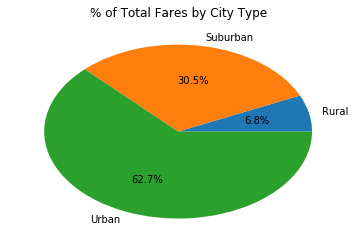

In [6]:
# Calculate Type Percents
fair_total = joined_table.groupby("type").sum()
city_types = list(fair_total.index)

# Build Pie Chart
plt.pie(fair_total["fare"], labels=city_types, autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("fares_by_city_type.png", layout="tight")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

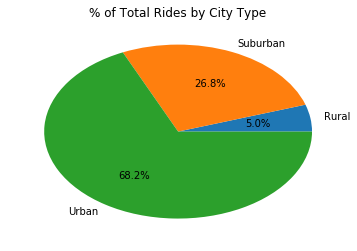

In [8]:
# Calculate Ride Percents
ride_count = joined_table.groupby("type").count()
city_types = list(ride_count.index)

# Build Pie Chart
plt.pie(fair_total["ride_id"], labels=city_types, autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("rides_by_city_type.png", layout="tight")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

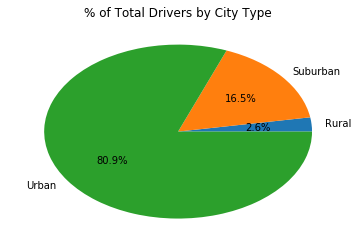

In [10]:
# Calculate Driver Percents
driver_count = city_data.groupby("type").sum()
city_types = list(driver_count.index)

# Build Pie Chart
plt.pie(driver_count["driver_count"], labels=city_types, autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("driver_count_by_city_type.png", layout="tight")

In [11]:
# Show Figure
plt.show()